In [6]:
import sklearn
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
def Parse_Default(data):
    pass
    

In [10]:
class Logistic_Regression:
    from sklearn.linear_model import LogisticRegression
    def __init__(data, parse_function=Parse_Default, penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None):
        self.data = parse_function(data)
        self.model = LogisticRegression(penalty, dual, tol, C, fit_intercept, intercept_scaling, class_weight, random_state, solver, max_iter, multi_class, verbose, warm_start, n_jobs).fit(data.xtrain, data.ytrain)
    pass

class Ridge_Regression:
    from sklearn.linear_model import RidgeCV
    def __init__(data, parse_function=Parse_Default, alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False):
        self.data = parse_function(data)
        self.model = RidgeCV(alphas, fit_intercept, normalize, scoring, cv, gcv_mode, store_cv_values).fit(data.xtrain, data.ytrain)
    pass

class Linear_Regression:
    from sklearn.linear_model import LinearRegression
    def __init__(data, parse_function=Parse_Default,fit_intercept=True, normalize=False, copy_X=True, n_jobs=None):
        self.data = parse_function(data)
        self.model = LinearRegression(fit_intercept, normalize, copy_X, n_jobs).fit(model.xtrain, model.ytrain)
    pass



In [77]:
df = pd.read_csv('hourly_stocks.csv')
diffs = []
names = []
prices = []
for i in range(1, len(df.columns), 2):
    names.append(df.columns[i][:-5].upper())
    closing = np.array(df.iloc[:,[i+1]])
    opening = np.array(df.iloc[:,[i]])
    diffs.append(closing - opening)
    prices.append(np.insert(closing, np.arange(len(closing)), opening, axis=0))

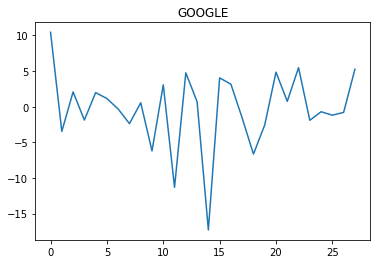

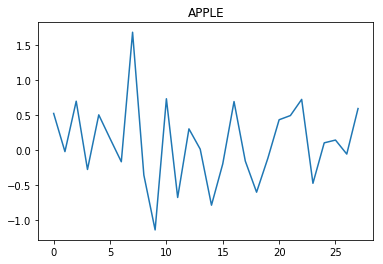

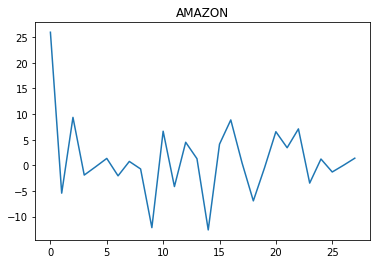

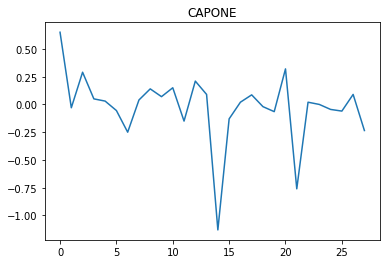

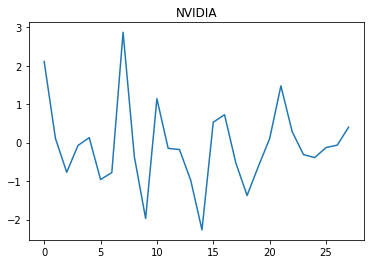

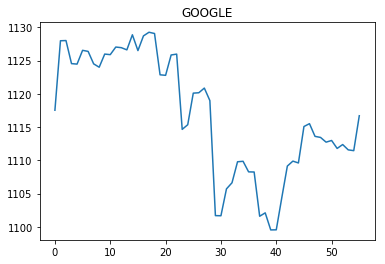

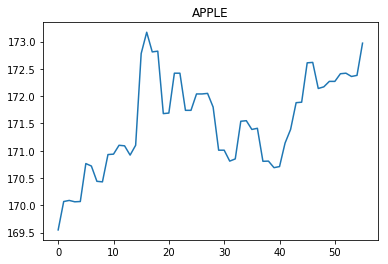

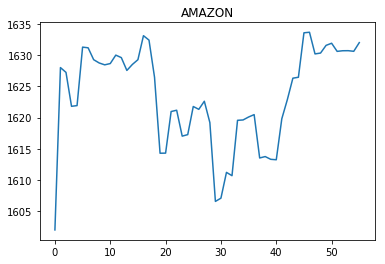

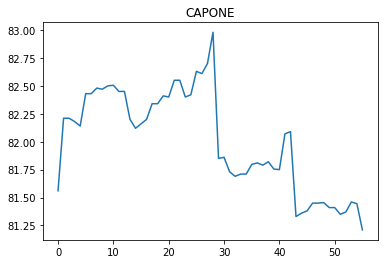

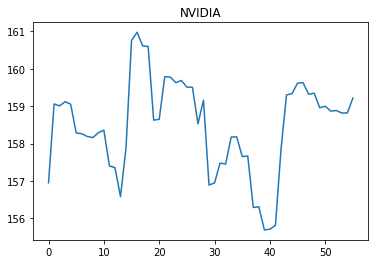

In [81]:
for stock,name in zip(diffs,names):
    plt.plot(stock)
    plt.title(name)
    plt.show()
for price,name in zip(prices,names):
    plt.plot(price)
    plt.title(name)
    plt.show()

In [74]:
a = np.array([[1],[3],[5],[7]])
b = np.array([[2],[4],[6],[8]])
np.insert(b,np.arange(len(a)),a, axis=0)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])